/var/folders/6p/w637w51x6qs879krdfn723gh0000gn/T/ipykernel_42283/2311202235.py:14: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.txt", delimiter="|")


✅ Data Preview:
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   

       AccountType  ...         ExcessSelected CoverCategory   CoverType  \
0  Current account  ...  Mobility - Windscreen    Windscreen  Windscreen   
1  Current account  ...  Mobility - Windscreen    Windscreen  Windscreen   
2  Current account  ...  Mobility - Windscreen    Windscreen  Windscreen   

             CoverGroup              Section                          Product  \
0  Comprehen

/Users/jerus/Desktop/KAIM/B5W3-Insurance-Analytics/venv/lib/python3.13/site-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)



📊 Descriptive Statistics:
        UnderwrittenCoverID      PolicyID               TransactionMonth  \
count         1.000098e+06  1.000098e+06                        1000098   
mean          1.048175e+05  7.956682e+03  2015-02-28 10:49:29.147423744   
min           1.000000e+00  1.400000e+01            2013-10-01 00:00:00   
25%           5.514300e+04  4.500000e+03            2015-01-01 00:00:00   
50%           9.408300e+04  7.071000e+03            2015-04-01 00:00:00   
75%           1.391900e+05  1.107700e+04            2015-06-01 00:00:00   
max           3.011750e+05  2.324600e+04            2015-08-01 00:00:00   
std           6.329371e+04  5.290039e+03                            NaN   

         PostalCode        mmcode  RegistrationYear      Cylinders  \
count  1.000098e+06  9.995460e+05      1.000098e+06  999546.000000   
mean   3.020601e+03  5.487770e+07      2.010225e+03       4.046642   
min    1.000000e+00  4.041200e+06      1.987000e+03       0.000000   
25%    8.270000e

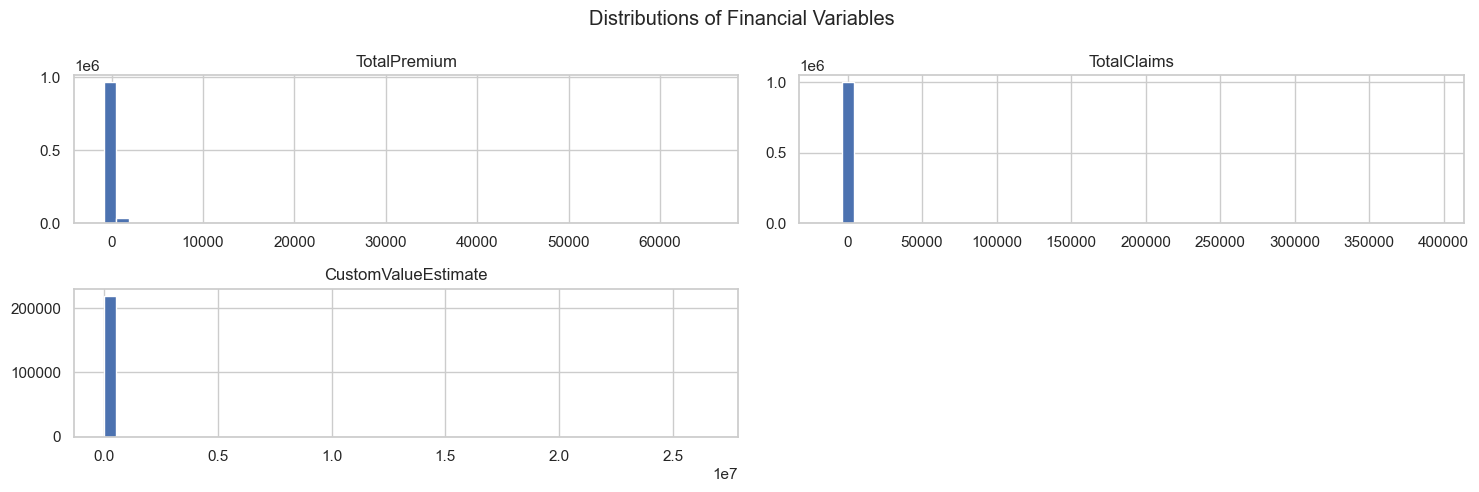

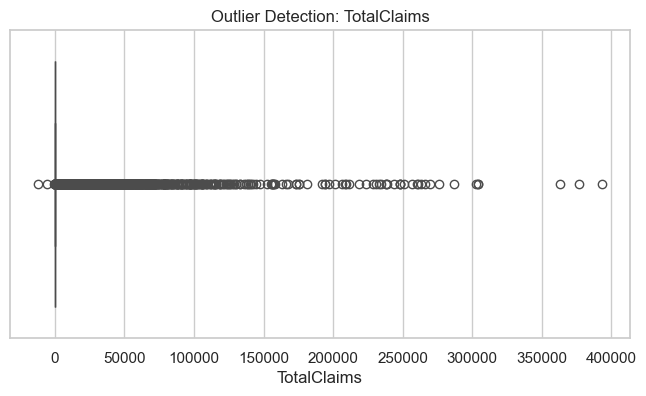


📉 Average Loss Ratio by Province:


Province
Eastern Cape          inf
Free State            inf
KwaZulu-Natal         inf
Limpopo               inf
North West            inf
Western Cape          inf
Northern Cape    0.203831
Gauteng               NaN
Mpumalanga            NaN
Name: LossRatio, dtype: float64


📉 Average Loss Ratio by Gender:


Gender
Female           inf
Male             inf
Not specified    NaN
Name: LossRatio, dtype: float64


📉 Average Loss Ratio by VehicleType:


VehicleType
Bus                       inf
Heavy Commercial          inf
Medium Commercial         inf
Light Commercial     0.543917
Passenger Vehicle         NaN
Name: LossRatio, dtype: float64

/var/folders/6p/w637w51x6qs879krdfn723gh0000gn/T/ipykernel_42283/2311202235.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=province_loss.index, y=province_loss.values, palette="viridis")


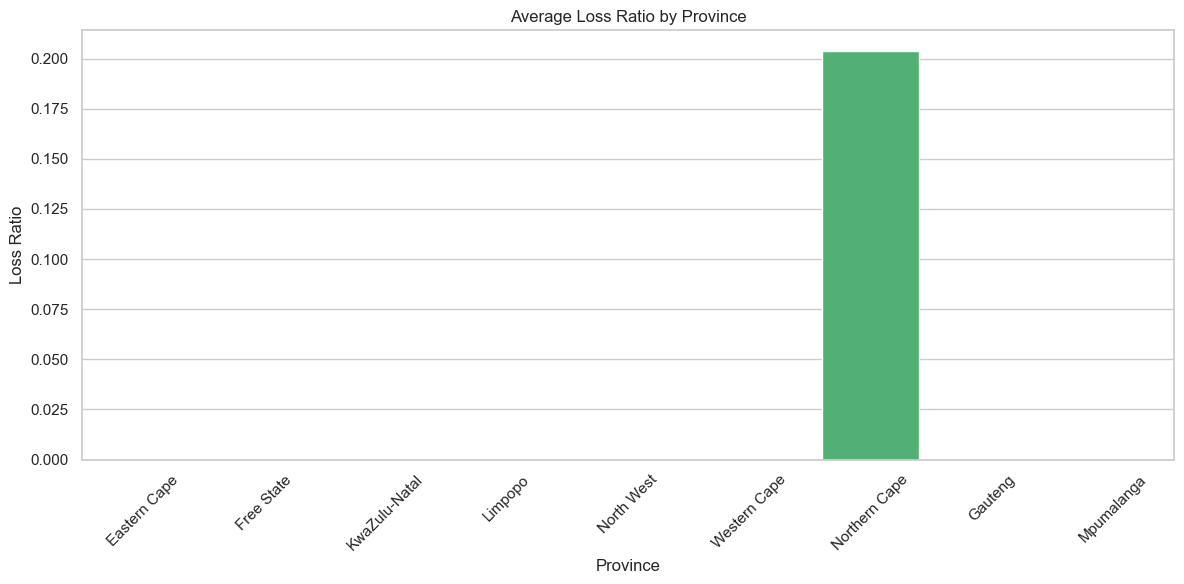

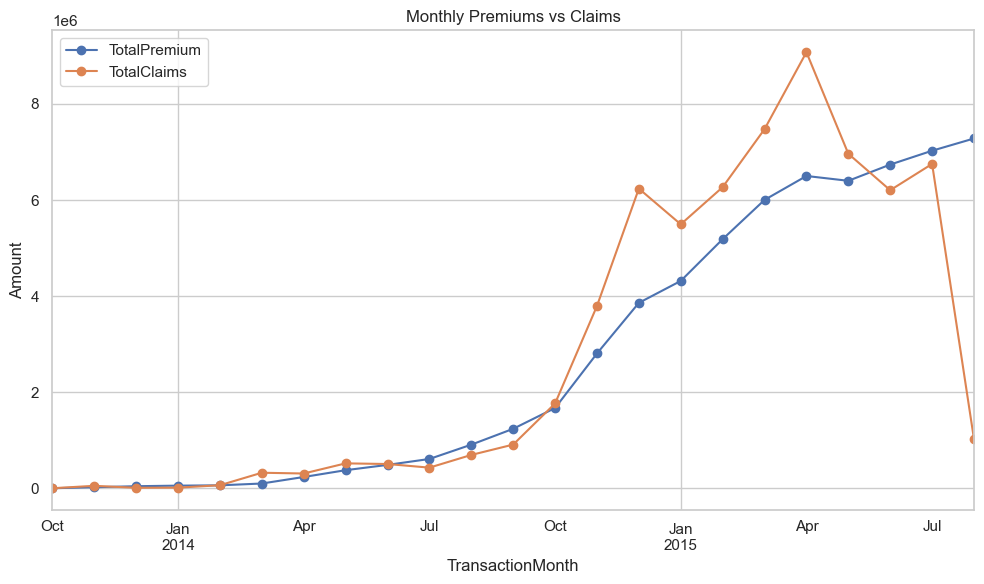

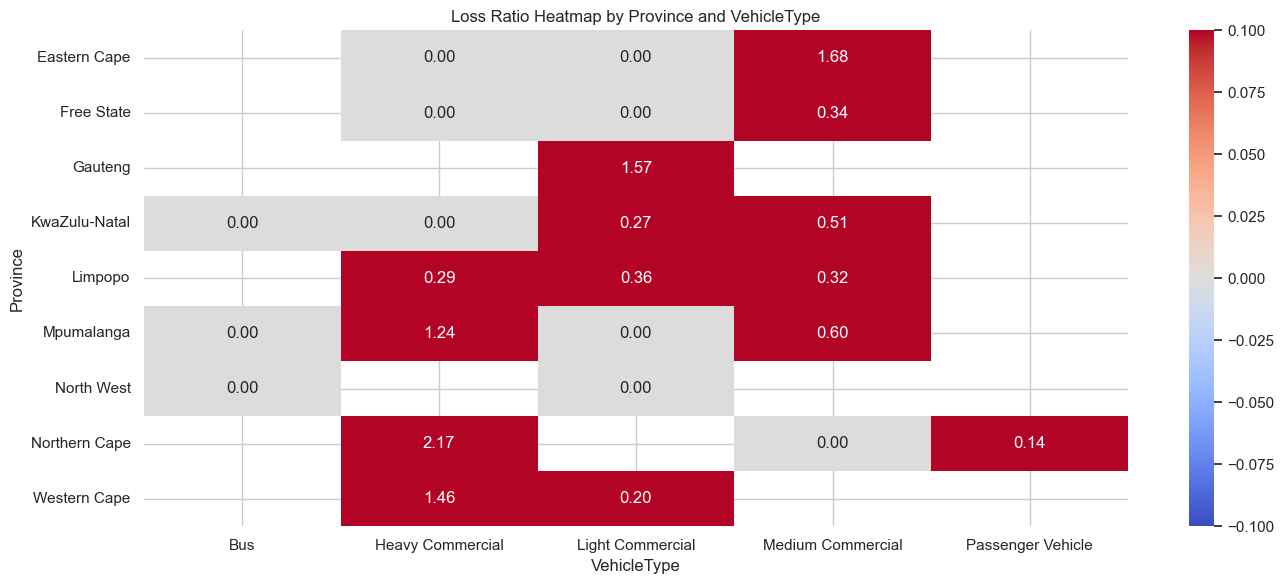

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create plots directory if it doesn't exist
os.makedirs("plots", exist_ok=True)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# ✅ Load dataset with correct delimiter
df = pd.read_csv("../data/MachineLearningRating_v3.txt", delimiter="|")

# ✅ Initial preview
print("✅ Data Preview:")
print(df.head(3))
print("\n🧾 Columns:", df.columns.tolist())
print("\n📋 Info:")
print(df.info())
print("\n❓ Missing Values:")
print(df.isnull().sum())

# 3. Inspect Dataset Structure
print("🧾 Columns:", df.columns.tolist())
print(df.head())
print(df.info())
print("\n🔍 Missing Values:\n", df.isnull().sum())

# 4. Preprocessing
if "TransactionMonth" in df.columns:
    df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors='coerce')

if "TotalClaims" in df.columns and "TotalPremium" in df.columns:
    df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]
    df["ClaimOccurred"] = (df["TotalClaims"] > 0).astype(int)

# 5. Descriptive Statistics
print("\n📊 Descriptive Statistics:\n", df.describe())

# 6. Histograms
num_cols = ["TotalPremium", "TotalClaims", "CustomValueEstimate"]
existing_num_cols = [col for col in num_cols if col in df.columns]
if existing_num_cols:
    df[existing_num_cols].hist(bins=50, figsize=(15, 5))
    plt.suptitle("Distributions of Financial Variables")
    plt.tight_layout()
    plt.savefig("plots/histograms_financial_variables.png")
    plt.show()

# 7. Boxplot for Outliers
if "TotalClaims" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df["TotalClaims"])
    plt.title("Outlier Detection: TotalClaims")
    plt.savefig("plots/boxplot_totalclaims.png")
    plt.show()

# 8. Grouped Loss Ratio Averages
group_cols = ["Province", "Gender", "VehicleType"]
for col in group_cols:
    if col in df.columns:
        print(f"\n📉 Average Loss Ratio by {col}:")
        display(df.groupby(col)["LossRatio"].mean().sort_values(ascending=False))

# 9. Bar Plot: Loss Ratio by Province
if "Province" in df.columns:
    province_loss = df.groupby("Province")["LossRatio"].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=province_loss.index, y=province_loss.values, palette="viridis")
    plt.xticks(rotation=45)
    plt.title("Average Loss Ratio by Province")
    plt.ylabel("Loss Ratio")
    plt.xlabel("Province")
    plt.tight_layout()
    plt.savefig("plots/loss_ratio_by_province.png")
    plt.show()

# 10. Monthly Premium vs Claims Trend
if "TransactionMonth" in df.columns:
    monthly = df.groupby(df["TransactionMonth"].dt.to_period("M")).agg({
        "PolicyID": "count",
        "TotalClaims": "sum",
        "TotalPremium": "sum"
    })
    monthly["LossRatio"] = monthly["TotalClaims"] / monthly["TotalPremium"]
    monthly.index = monthly.index.to_timestamp()
    monthly[["TotalPremium", "TotalClaims"]].plot(marker='o')
    plt.title("Monthly Premiums vs Claims")
    plt.ylabel("Amount")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("plots/monthly_trends_premiums_claims.png")
    plt.show()

# 11. Heatmap: Province vs VehicleType Loss Ratio
if "Province" in df.columns and "VehicleType" in df.columns:
    pivot = df.pivot_table(index="Province", columns="VehicleType", values="LossRatio", aggfunc="mean")
    plt.figure(figsize=(14, 6))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Loss Ratio Heatmap by Province and VehicleType")
    plt.tight_layout()
    plt.savefig("plots/heatmap_lossratio_province_vehicle.png")
    plt.show()
